In [1]:
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation, FFMpegWriter 
import plots 
plots.mpltoolkit.load_mpl_presets() 
import numpy as np 
import vice 
import sys 
sys.path.append("..") 
import src 

/Users/astrobeard/.local/lib/python3.7/site-packages/vice-1.3.0-py3.7-macosx-10.9-x86_64.egg/vice/__init__.py:136: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


/Users/astrobeard/.local/lib/python3.7/site-packages/vice-1.3.0-py3.7-macosx-10.9-x86_64.egg/vice/core/outputs/output.py:131: UserWarning: agb n yield not encoded with output. Assuming the current yield setting, which may not reflect the yield setting at the time the simulation was ran.
  self.__c_version = c_output(name)


T = 13.20 Gyr
T = 13.20 Gyr


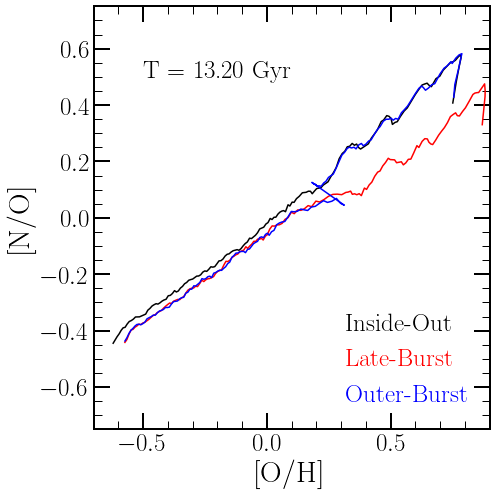

In [6]:
fig = plt.figure(figsize = (7, 7), facecolor = "white") 
ax = fig.add_subplot(111) 
ax.set_xlabel("[O/H]") 
ax.set_ylabel("[N/O]") 
ax.set_xlim([-0.7, 0.9]) 
ax.set_ylim([-0.75, 0.75]) 
ax.set_yticks([-0.6 + 0.2 * _ for _ in range(7)]) 
colors = {
    "insideout": "black", 
    "lateburst": "red", 
    "outerburst": "blue" 
} 
insideout_line = ax.plot([], [], label = "Inside-Out", c = plots.mpltoolkit.named_colors()[colors["insideout"]])[0] 
lateburst_line = ax.plot([], [], label = "Late-Burst", c = plots.mpltoolkit.named_colors()[colors["lateburst"]])[0] 
outerburst_line = ax.plot([], [], label = "Outer-Burst", c = plots.mpltoolkit.named_colors()[colors["outerburst"]])[0] 
plt.tight_layout() 
timestamp = ax.text(-0.5, 0.5, "T = 0.00 Gyr", fontsize = 25) 
insideout = vice.output("../outputs/diffusion/insideout") 
lateburst = vice.output("../outputs/diffusion/lateburst") 
outerburst = vice.output("../outputs/diffusion/outerburst") 
zones = ["zone%d" % (_) for _ in range(155)] 
leg = ax.legend(loc = plots.mpltoolkit.mpl_loc("lower right"), ncol = 1, frameon = False, 
    fontsize = 25, handlelength = 0) 
for i in range(3): 
    leg.get_texts()[i].set_color(["black", "red", "blue"][i]) 
    leg.legendHandles[i].set_visible(False) 

def init(): 
    return [insideout_line, lateburst_line, outerburst_line] 

def update(frame): 
    time = "T = %.2f Gyr" % (insideout.zones["zone0"].history["time"][frame]) 
    sys.stdout.write("\r%s" % (time)) 
    sys.stdout.flush() 
    timestamp.set_text(time) 
    insideout_xvals = [insideout.zones[_].history["[o/h]"][frame] for _ in zones] 
    insideout_yvals = [insideout.zones[_].history["[n/o]"][frame] for _ in zones] 
    lateburst_xvals = [lateburst.zones[_].history["[o/h]"][frame] for _ in zones] 
    lateburst_yvals = [lateburst.zones[_].history["[n/o]"][frame] for _ in zones] 
    outerburst_xvals = [outerburst.zones[_].history["[o/h]"][frame] for _ in zones] 
    outerburst_yvals = [outerburst.zones[_].history["[n/o]"][frame] for _ in zones] 
    insideout_line.set_data(insideout_xvals, insideout_yvals) 
    lateburst_line.set_data(lateburst_xvals, lateburst_yvals) 
    outerburst_line.set_data(outerburst_xvals, outerburst_yvals) 
    return [insideout_line, lateburst_line, outerburst_line] 

ani = FuncAnimation(fig, update, frames = len(insideout.zones["zone0"].history["time"]), 
    init_func = init, blit = True, interval = 10, repeat_delay = 1000) 
writer = FFMpegWriter(fps = 100) 
for ext in ["mp4", "gif"]: 
    ani.save("no_oh_tracks_sfh_comparison.%s" % (ext), writer = writer) 
    sys.stdout.write("\n") 